## Implementing Lasso Regression(L1 regularization) using sklearn
We are now going to implement the same algorithm using sklearn

#### Importing Libraries

In [80]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt

#### Importing Data

In [81]:
df = pd.read_csv("https://raw.githubusercontent.com/sahdevsaini/Data-Set/main/Salary_Data.csv")

In [82]:
df.shape

(30, 2)

In [83]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


#### Selecting Dependent Variable & Independent Varible 

In [85]:
X = df.iloc[:,:1]         # Independent Varible (Year Of Experiance)
y = df.iloc[:,-1]         # Dependent varible (Salary)

#### And now we split the data into training and testing. With shuffeling of course. And we reshape the training and testing X value.

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#### Then we fit our linear regression model.

In [87]:
from sklearn.linear_model import LinearRegression
simple_linear_regression = LinearRegression()
simple_linear_regression.fit(X_train,y_train)

LinearRegression()

We can then test our model with the predict function and see how well it did with the mean_squared_error function

In [88]:
from sklearn.metrics import mean_squared_error
predicted_y = simple_linear_regression.predict(X_test)
rmse = sqrt(mean_squared_error(y_test,predicted_y))

print("Root Mean Squared Error value = {}".format(rmse))

Root Mean Squared Error value = 5881.210207395417


#### Slope of best fit Line

In [89]:
m= simple_linear_regression.coef_[0]
m

9218.848975984205

#### Intercept of best Fit line

In [90]:
b = simple_linear_regression.intercept_
b

26818.23321668496

#### Equation of best fit line

In [119]:
print("Y = ({} * X)+ {}".format(m,b))

Y = (8960.588372619652 * X)+ 28207.46004561679


In [92]:
def plot_linear_regression_result(x,y,predicted_y):
    # plotting the actual points as a scatter
    plt.figure(figsize=(8,4))
    plt.scatter(x,y,color = "g", marker = "o",s=30)
    
    # plotting the regression line
    plt.plot(x, predicted_y, color = "r", linewidth=2)
 
    # putting labels
    plt.title('Linear regression of Year of Experiance & Salary')
    plt.xlabel('YearsExperience')
    plt.ylabel('Salary')
 
    # function to show plot
    plt.show()

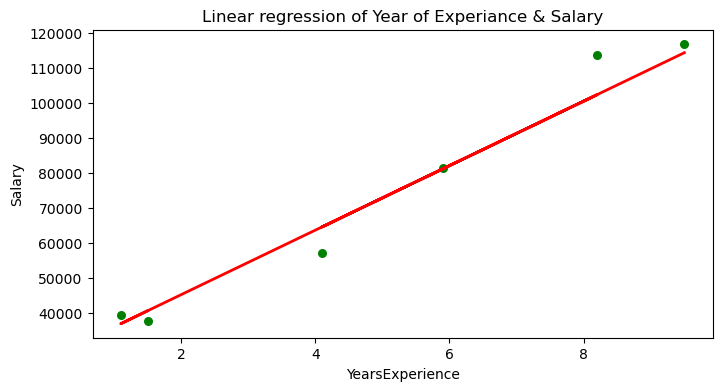

In [93]:
plot_linear_regression_result(X_test,y_test,predicted_y)

In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predicted_y)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predicted_y)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, predicted_y, squared=False)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, predicted_y)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Mean Absolute Error (MAE): 4493.086354221964
Mean Squared Error (MSE): 34588633.50357204
Root Mean Squared Error (RMSE): 5881.210207395417
R-squared (R2) Score: 0.9669927637846072


#### Accuracy of model

In [95]:
print("Accuacy of model:-", r2*100)

Accuacy of model:- 96.69927637846072


#### Predication model

In [96]:
def predication(X):
    Y = (26858.283390428558 * X)+ 9257.234097109678
    return Y

In [97]:
predication(2.2)

68345.45755605251

#### Comparsion of Predicated value & Actual value

In [98]:
pd.DataFrame({"Predicated Value" : predicted_y,
              "Actual Value" : y_test})

,Predicated Value,Actual Value
2,40646.506681,37731.0
0,36958.967090,39343.0
23,102412.794820,113812.0
13,64615.514018,57081.0
18,81209.442175,81363.0
26,114397.298489,116969.0


# ---------------  Lasso Regression(L1 regularization) -------------------
```python
Lasso regression, also known as L1 regularization, is a linear regression technique that adds a penalty term to the ordinary least squares (OLS) objective function. This penalty term is the sum of the absolute values of the coefficients multiplied by a regularization parameter (alpha). The objective of Lasso regression is to minimize the sum of squared residuals while also minimizing the sum of the absolute values of the coefficients.


The formula for Lasso (Least Absolute Shrinkage and Selection Operator) regression is an extension of the ordinary least squares (OLS) regression with an additional regularization term.
```
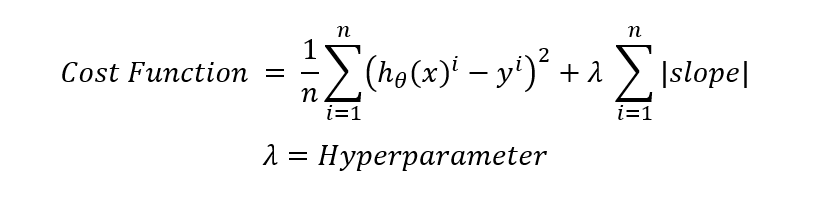

#### Importing model

In [135]:
from sklearn.linear_model import Lasso          # Import Lasso regression model
from sklearn.model_selection import GridSearchCV     # Import GridSearchCV for hyperparameter tuning

#### Instantiate Lasso Model

In [162]:
lasso=Lasso()          # Create an instance of the Lasso regression model

In [163]:
lasso

Lasso()

#### Define Hyperparameter Grid
#### Define a dictionary containing the values of the regularization parameter (alpha) to be tested

In [164]:
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

#### Create a GridSearchCV object:
```python
   - ridge: The estimator (Ridge regression model)
   - parameters: The parameter grid to search over
   - scoring='neg_mean_squared_error': The scoring metric to optimize (negative mean squared error).
   - cv=5: Cross-validation strategy (5-fold cross-validation)
```

In [165]:
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

#### Fit GridSearchCV
#### Fit the GridSearchCV object on the data (X features and y target)

In [166]:
lasso_regressor.fit(X,y)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.968e+08, tolerance: 1.382e+06
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.768e+08, tolerance: 1.960e+06
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.105e+08, tolerance: 2.047e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

#### Print the best parameters found by GridSearchCV
#### Print the best mean squared error score achieved by the Ridge regression model with the best parameters

In [167]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 100}
-43897799.395862736


#### Instantiate Ridge model with best parameters

In [168]:
best_alpha = lasso_regressor.best_params_['alpha']
lasso_model = Lasso(alpha=best_alpha)

#### Fit the model on the training data

In [169]:
lasso_model.fit(X_train, y_train)

Lasso(alpha=100)

#### Predict on the test data

In [171]:
y_pred_lasso = lasso_model.predict(X_test)

#### Slope of ridge_model best fit line

In [172]:
m= lasso_model.coef_[0]
m

9205.014494981398

#### Intercept of ridge_model best fit line 

In [173]:
b = lasso_model.intercept_
b

26892.651195745893

#### best fit line of ridge_model 

In [174]:
print("Y = ({} * X)+ {}".format(m,b))

Y = (9205.014494981398 * X)+ 26892.651195745893


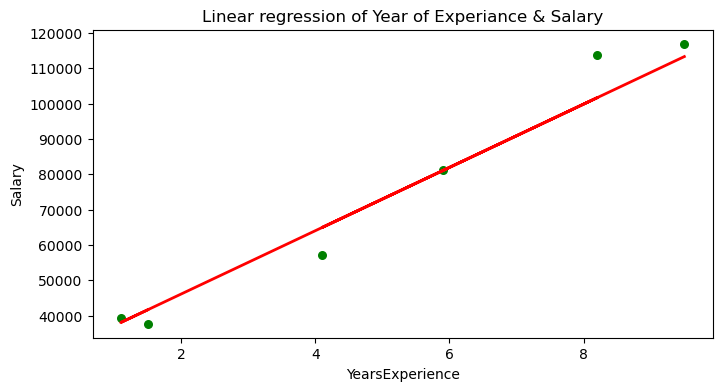

In [175]:
plot_linear_regression_result(X_test,y_test,y_pred_ridge)

In [176]:
# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_lasso)
print("Mean Squared Error (MSE) for Ridge:", mse_ridge)

Mean Squared Error (MSE) for Ridge: 34837632.044118136


In [177]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_lasso)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_lasso)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_lasso, squared=False)

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred_lasso)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Mean Absolute Error (MAE): 4512.320125727249
Mean Squared Error (MSE): 34837632.044118136
Root Mean Squared Error (RMSE): 5902.341234130583
R-squared (R2) Score: 0.9667551494930728


In [183]:
print("Accuacy of model:-", r2*100)

Accuacy of model:- 96.67551494930728


#### Difference between Linear regression and Lasso Predicted model

In [194]:
r2 = r2_score(predicted_y, y_pred_lasso)
print(r2*100)

99.99977233963644


In [197]:
from sklearn.metrics import r2_score

# Calculate R-squared (R2) score for linear regression
r2_linear = r2_score(predicted_y, y_test)

# Calculate R-squared (R2) score for Lasso regression
r2_lasso = r2_score(y_pred_lasso, y_test)

print("R-squared (R2) score for Linear Regression:", r2_linear * 100)
print("R-squared (R2) score for Lasso Regression:", r2_lasso * 100)
r2_improvement = r2_lasso - r2_linear
r2_improvement

R-squared (R2) score for Linear Regression: 95.89972462209693
R-squared (R2) score for Lasso Regression: 95.8577844394974


-0.0004194018259953136

#### Comaprsion of Actual value Predicated_y, Lasso model prediucted

In [180]:
pd.DataFrame({"Actual Value" : y_test,
              "Predicated Value" : predicted_y,
              "Lasso Model Predicted Value" : y_pred_lasso})

,Actual Value,Predicated Value,Lasso Model Predicted Value
2,37731.0,40646.506681,40700.172938
0,39343.0,36958.967090,37018.167140
23,113812.0,102412.794820,102373.770055
13,57081.0,64615.514018,64633.210625
18,81363.0,81209.442175,81202.236716
26,116969.0,114397.298489,114340.288898


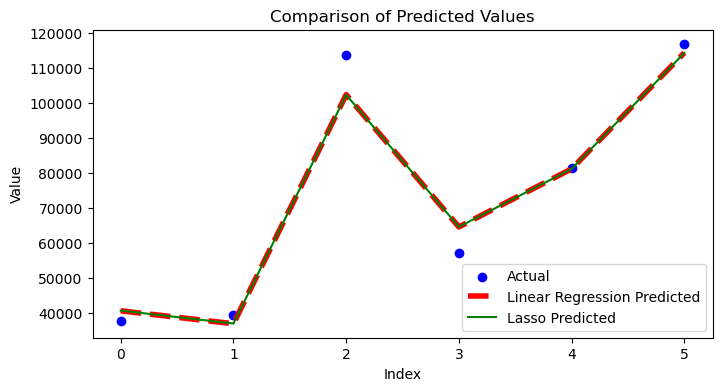

In [192]:
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(8, 4))

# Plot actual values
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')

# Plot linear regression predicted values (dotted line with thicker width)
plt.plot(range(len(predicted_y)), predicted_y, color='red', linestyle='--', linewidth=4, label='Linear Regression Predicted')

# Plot Lasso regression predicted values
plt.plot(range(len(y_pred_lasso)), y_pred_lasso, color='green', label='Lasso Predicted')

plt.title('Comparison of Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()


In [181]:
def predict(X):
    Y = (8960.588372619652 * X)+ 28207.46004561679
    return round(Y,2)

In [182]:
experience = 3
print(f"Salary with {experience} Experience: {predict(experience)}")


Salary with 3 Experience: 55089.23


In [ ]:
#### Improvement after Using Ridge Regression

In [198]:
improve  = r2_lasso - r2_linear
print("After Apply Ridge Regession improvement in model:- ",improve*100,"%")

After Apply Ridge Regession improvement in model:-  -0.04194018259953136 %


```python
Negative value means Lasso regression is not good for this model
we should use Ridge or elastic net for this model
```